## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [6]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units = 10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model



NameError: name 'model' is not defined

In [17]:
model = build_mlp(input_shape = x_train.shape[1:], num_neurons=[512, 256, 128, 128, 128, 256, 256, 128, 512])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 256)               33024     
__________

In [18]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [19]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0714 13:01:14.101300 4649358784 deprecation_wrapper.py:119] From /Users/chibaryowei/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 13:01:14.113721 4649358784 deprecation_wrapper.py:119] From /Users/chibaryowei/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0714 13:01:20.612026 4649358784 deprecation.py:323] From /Users/chibaryowei/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 13:01:20.706870 4649358784 deprecation_wrapper.py:119] From /Users/chibaryowei/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 292us/step - loss: 1.9858 - acc: 0.2581 - val_loss: 1.8160 - val_acc: 0.3423
Epoch 2/100
50000/50000 [==============================] - 11s 227us/step - loss: 1.7787 - acc: 0.3527 - val_loss: 1.7669 - val_acc: 0.3524
Epoch 3/100
50000/50000 [==============================] - 14s 285us/step - loss: 1.7035 - acc: 0.3804 - val_loss: 1.7129 - val_acc: 0.3800
Epoch 4/100
50000/50000 [==============================] - 15s 292us/step - loss: 1.6541 - acc: 0.4005 - val_loss: 1.5724 - val_acc: 0.4328
Epoch 5/100
50000/50000 [==============================] - 16s 311us/step - loss: 1.5732 - acc: 0.4309 - val_loss: 1.5537 - val_acc: 0.4461
Epoch 6/100
50000/50000 [==============================] - 15s 292us/step - loss: 1.5373 - acc: 0.4456 - val_loss: 1.5488 - val_acc: 0.4480
Epoch 7/100
50000/50000 [==============================] - 12s 245us/step - loss: 1.4982 - acc: 0.4603 - val_l

Epoch 59/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.5872 - acc: 0.7848 - val_loss: 2.1437 - val_acc: 0.5030
Epoch 60/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.5920 - acc: 0.7830 - val_loss: 2.0298 - val_acc: 0.4995
Epoch 61/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.5964 - acc: 0.7835 - val_loss: 2.1292 - val_acc: 0.5046
Epoch 62/100
50000/50000 [==============================] - 12s 236us/step - loss: 0.5721 - acc: 0.7915 - val_loss: 2.1311 - val_acc: 0.5140
Epoch 63/100
50000/50000 [==============================] - 11s 224us/step - loss: 0.5657 - acc: 0.7943 - val_loss: 2.1561 - val_acc: 0.5021
Epoch 64/100
50000/50000 [==============================] - 237s 5ms/step - loss: 0.5539 - acc: 0.7972 - val_loss: 2.1873 - val_acc: 0.5073
Epoch 65/100
50000/50000 [==============================] - 17s 331us/step - loss: 0.5489 - acc: 0.8006 - val_loss: 2.2219 - val_acc: 0.5016
Epoch 66/100
5

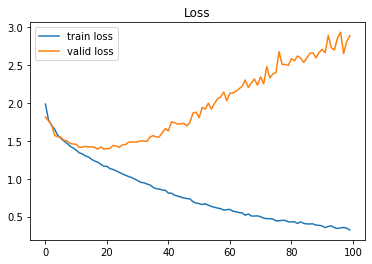

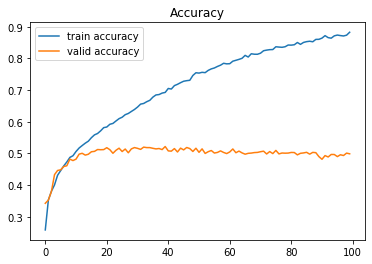

In [22]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()